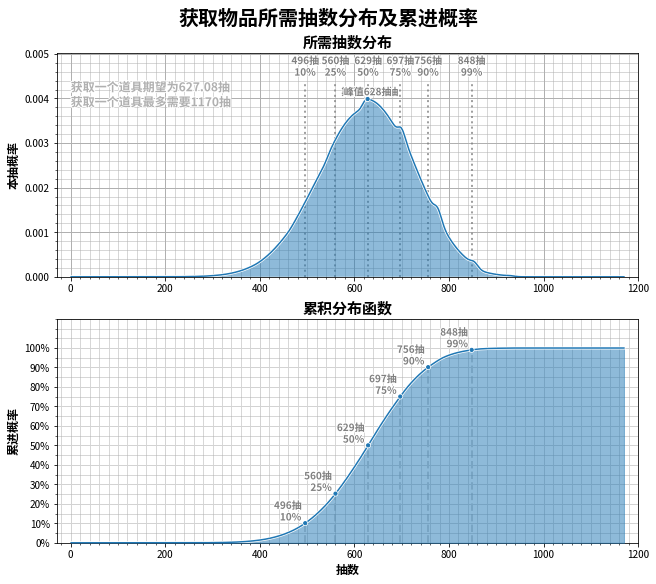

In [15]:
# 绘图前需要安装 matplotlib 以及需要的字体包
import GGanalysis.games.genshin_impact as GI
# 获得原神抽一个UP五星角色+定轨抽特定UP五星武器的分布
dist = GI.up_5star_character(item_num=7)# * GI.up_5star_ep_weapon(item_num=1)
# 导入绘图模块
from GGanalysis.gacha_plot import DrawDistribution
fig = DrawDistribution(dist, show_description=True)
fig.show_two_graph(dpi=72)

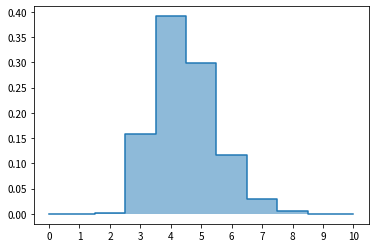

In [15]:
#投入k抽，能抽到道具个数的分布
#https://github.com/OneBST/GGanalysis/issues/37#issuecomment-2417311734
import GGanalysis.games.genshin_impact as GI
import numpy as np
from GGanalysis import *
k = 440
# 计算获得 0-k 个道具所需抽数分布并以列表形式返回，因为原神 360 抽几乎不能抽超过10个UP五星，因此设置为10以减小计算量
distributions = GI.up_5star_character(10, multi_dist=True)
# 获得能得到道具数量的分布，其中最末尾分布表示大于等于这个数量道具数的和
item_num_dist = calc_item_num_dist(distributions, k)
# 画图，参考 https://blog.csdn.net/qq_52057693/article/details/121464137
from matplotlib import pyplot as plt
#plt.figure(figsize=(20,8),dpi=150)        #图片大小为20*8，每英寸150个像素点
plt.fill_between(range(len(item_num_dist)), 0, item_num_dist[:], alpha=0.5, step='mid', edgecolor='none')
plt.step(range(len(item_num_dist)), item_num_dist[:], where='mid')
plt.xticks(range(len(item_num_dist))) #x轴刻度
plt.show()

In [5]:
# 计算抽卡所需抽数分布律 以原神为例
import GGanalysis.games.genshin_impact as GI
# 原神角色池的计算
print('角色池在垫了20抽，有大保底的情况下抽3个UP五星抽数的分布')
dist_c = GI.up_5star_character(item_num=3, item_pity=20, up_pity=1, cr_pity=1)
print('期望为', dist_c.exp, '方差为', dist_c.var, '分布为', dist_c.dist)

# 计算抽卡所需抽数分布律 以明日方舟为例
import GGanalysis.games.arknights as AK
# 普池双UP的计算 item_num是要抽多少个 item_pity是当前垫了多少抽，从零开始填0就行
dist_c = AK.dual_up_specific_6star(item_num=3, item_pity=20)
print('期望为', dist_c.exp, '方差为', dist_c.var, '分布为', dist_c.dist)

角色池在垫了20抽，有大保底的情况下抽3个UP五星抽数的分布
期望为 220.1099489499683 方差为 2803.547143392978 分布为 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.94000000e-08
 1.78041240e-07 3.55756115e-07 5.92368368e-07 8.87693285e-07
 1.24153788e-06 1.65370108e-06 2.12397391e-06 2.65213969e-06
 3.23797418e-06 3.88124578e-06 4.58171571e-06 5.33913816e-06
 6.15326046e-06 7.02382328e-06 7.95056073e-06 8.93320061e-06
 9.97146447e-06 1.10650679e-05 1.22137204e-05 1.34171260e-05
 1.46749830e-05 1.59869842e-05 1.73528173e-05 1.87721646e-05
 2.02447037e-05 2.17701071e-05 2.33480426e-05 2.49781734e-05
 2.66601584e-05 2.83936520e-05 3.01783045e-05 3.20137620e-05
 3.38996668e-05 3.58356572e-05 3.78213681e-05 3.98564305e-05
 4.19404721e-05 4.40731173e-05 4.62539871e-05 4.84826996e-05
 5.07588696e-05 5.30821093e-05 5.54520280e-05 5.78682323e-05
 6.03303261e-05 6.28379110e-05 6.53905863e-05 6.79879488e-05
 7.06295932e-05 7.33151121e-05 7.60440963e-05 7.88161344e-05
 8.20625957e-05 8.61566985e-05 9.13466493e-05 9.77192536e-05
 1.052

In [ ]:
#https://github.com/OneBST/GGanalysis/issues/79#issuecomment-2851184692
import GGanalysis.games.genshin_impact as GI
import GGanalysis as gg
pull = 1000
c_dist = GI.up_5star_character(1, item_pity=30, up_pity=1)  # 这里设定了初始情况有大保底，垫了30抽，可以去除
f_dist = GI.up_5star_character(1)
# 得到花费 1000 抽对应获取道具数量分布的列表
dist_num_check = gg.independent_item_num_dist(f_dist, pull, c_dist, multi_dist=False)
# 得到花费 0-1000 抽对应获取道具数量分布的列表
dist_num_check = gg.independent_item_num_dist(f_dist, pull, c_dist, multi_dist=True)